In [1]:
# Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats as st
from scipy.stats import kstest

## 1. Measure of centrality

In [2]:
# Create an array that contains random number from 2 to 500 with 1000 elements 
# that follow uniform distribution then round it to the nearest integer
pineapple_juice = np.random.uniform(high=500, low=2, size=1000).round()

# Print 10 samples
print(f'''10 samples of the data: {pineapple_juice[:10]}''')

10 samples of the data: [314. 457. 246. 202. 413. 144. 271.  27. 220. 254.]


(array([ 99.,  91., 109.,  97.,  86., 112., 107.,  96., 106.,  97.]),
 array([  3. ,  52.7, 102.4, 152.1, 201.8, 251.5, 301.2, 350.9, 400.6,
        450.3, 500. ]),
 <BarContainer object of 10 artists>)

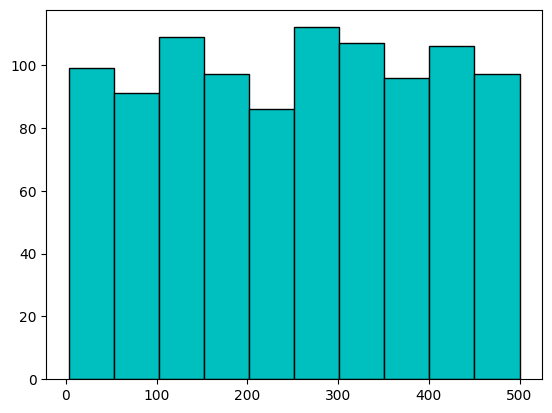

In [3]:
# Plot the histogram of the data
plt.hist(pineapple_juice, 
         bins=10, 
         color='c', 
         edgecolor='black')

In [4]:
# Mean of the data using numpy
print(f'''Mean of the data using numpy: {np.mean(pineapple_juice)}''')

# Mean of the data using statistics
print(f'''Mean of the data using statistics: {statistics.mean(pineapple_juice)}''')

# Median of the data using numpy
print(f'''Median of the data using numpy: {np.median(pineapple_juice)}''')

# Median of the data using statistics
print(f'''Median of the data using statistics: {statistics.median(pineapple_juice)}''')

# Mode of the data using statistics
print(f'''Mode of the data using statistics: {statistics.mode(pineapple_juice)}''')

Mean of the data using numpy: 253.112
Mean of the data using statistics: 253.112
Median of the data using numpy: 260.0
Median of the data using statistics: 260.0
Mode of the data using statistics: 154.0


## 2. Measure of spread

In [5]:
# Standard deviation of the data
print(f'''Standard deviation of the data: {statistics.stdev(pineapple_juice)}''')

# Range of the data
def range_data(data):
    return data.max() - data.min()

print(f'''Range of the data: {range_data(pineapple_juice)}''')

# Variance of the data
print(f'''Variance of the data: {statistics.variance(pineapple_juice)}''')

# Percentile 25% of the data using numpy
print(f'''Percentile 25% of the data: {np.percentile(pineapple_juice, 25)}''')

# Percentile 50% of the data using numpy
print(f'''Percentile 50% of the data: {np.percentile(pineapple_juice, 50)}''')

# Percentile 75% of the data using numpy
print(f'''Percentile 75% of the data: {np.percentile(pineapple_juice, 75)}''')

# Percentiles using statistics
print(f'''Percentiles using statistics: {statistics.quantiles(pineapple_juice, n=4)}''')

Standard deviation of the data: 143.46418866542768
Range of the data: 497.0
Variance of the data: 20581.97342942943
Percentile 25% of the data: 130.0
Percentile 50% of the data: 260.0
Percentile 75% of the data: 380.0
Percentiles using statistics: [np.float64(130.0), np.float64(260.0), np.float64(380.0)]


## 3. Correlation

In [6]:
# Import data
cars = pd.read_csv('cars.csv')

# Info of the data
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      428 non-null    object 
 1   sports_car                428 non-null    bool   
 2   suv                       428 non-null    bool   
 3   wagon                     428 non-null    bool   
 4   minivan                   428 non-null    bool   
 5   pickup                    428 non-null    bool   
 6   all_wheel                 428 non-null    bool   
 7   rear_wheel                428 non-null    bool   
 8   Price                     428 non-null    int64  
 9   Dealer_Cost               428 non-null    int64  
 10  Engine_size               428 non-null    float64
 11  cylenders                 428 non-null    int64  
 12  horsepower                428 non-null    int64  
 13  city_miles_per_galloon    414 non-null    float64
 14  highway_mi

In [7]:
# Describe the data
cars.describe()

,Price,Dealer_Cost,Engine_size,cylenders,horsepower,city_miles_per_galloon,highway_miles_per_Gallon,weight,base_wheeel,length,width
count,428.000000,428.000000,428.000000,428.000000,428.000000,414.000000,414.000000,426.000000,426.000000,402.000000,400.000000
mean,32774.855140,30014.700935,3.196729,5.775701,215.885514,20.089372,26.905797,3577.213615,108.173709,185.126866,71.292500
std,19431.716674,17642.117750,1.108595,1.622779,71.836032,5.213062,5.696804,760.437663,8.326449,13.312523,3.393484
min,10280.000000,9875.000000,1.300000,-1.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000,64.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3102.000000,103.000000,177.000000,69.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,186.000000,71.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.000000,29.000000,3974.250000,112.000000,193.000000,73.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,227.000000,81.000000


                        horsepower  city_miles_per_galloon
horsepower                1.000000               -0.666256
city_miles_per_galloon   -0.666256                1.000000
                        horsepower  city_miles_per_galloon
horsepower                1.000000               -0.666256
city_miles_per_galloon   -0.666256                1.000000


[]

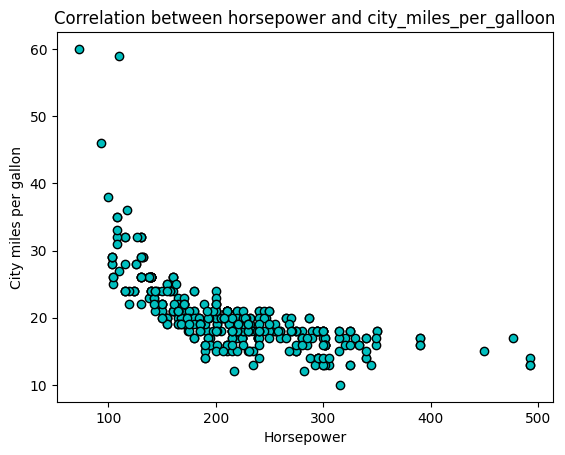

In [8]:
# Correlation between horsepower and city_miles_per_galloon

# Method 1
print(cars.loc[:,['horsepower','city_miles_per_galloon']].corr())

# Method 2
print(cars[['horsepower','city_miles_per_galloon']].corr())

# Scatter plot between horsepower and city_miles_per_galloon
plt.scatter(x='horsepower', y='city_miles_per_galloon', data=cars, color='c', edgecolor='black', marker='o')
plt.title('Correlation between horsepower and city_miles_per_galloon')
plt.xlabel('Horsepower')
plt.ylabel('City miles per gallon')
plt.plot()

In [9]:
# Correlation between multiple columns
cars[['Price',
      'horsepower',
      'city_miles_per_galloon',
      'weight',
      'length']
      ].corr()

,Price,horsepower,city_miles_per_galloon,weight,length
Price,1.000000,0.826945,-0.461130,0.449336,0.214889
horsepower,0.826945,1.000000,-0.666256,0.631525,0.379936
city_miles_per_galloon,-0.461130,-0.666256,1.000000,-0.737192,-0.464826
weight,0.449336,0.631525,-0.737192,1.000000,0.667169
length,0.214889,0.379936,-0.464826,0.667169,1.000000


Correlation between multiple columns of the cleaned data:                            Price  horsepower  city_miles_per_galloon  \
Price                   1.000000    0.835074               -0.485213   
horsepower              0.835074    1.000000               -0.671801   
city_miles_per_galloon -0.485213   -0.671801                1.000000   
weight                  0.475994    0.631058               -0.736166   
length                  0.209553    0.381426               -0.467586   

                          weight    length  
Price                   0.475994  0.209553  
horsepower              0.631058  0.381426  
city_miles_per_galloon -0.736166 -0.467586  
weight                  1.000000  0.652893  
length                  0.652893  1.000000  


<Axes: >

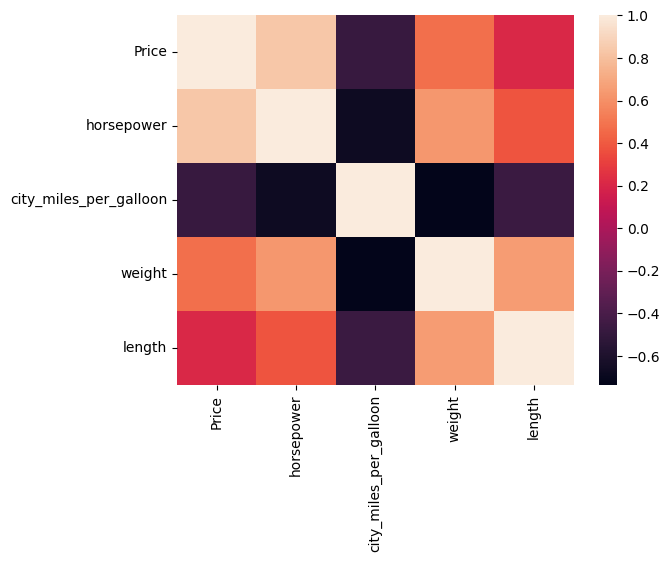

In [10]:
# Clean the data
cars_clean = cars.dropna(axis=0)

# Correlation between multiple columns of the cleaned data
correlation_data = cars_clean[['Price','horsepower','city_miles_per_galloon','weight','length']].corr()
print(f'''Correlation between multiple columns of the cleaned data: {correlation_data}''')

# Heatmap of the correlation data
sns.heatmap(correlation_data)

## 4. Outlier

In [11]:
# Create a numpy array
sales = np.array([5, 8, 10, 20, 100, 2, 65, 18, 32, 25, 200, 9, 15])

# Percentile of the data
first = np.percentile(sales, 25)
second = np.percentile(sales, 50)
third = np.percentile(sales, 75)

# Interquartile (IQR) range
iqr = third - first
print(f'''Interquartile (IQR) range: {iqr}''')

Interquartile (IQR) range: 23.0


In [12]:
# Calculate the thresholds
upper_threshold = third + iqr*1.5
lower_threshold = first - iqr*1.5

print(f'''Upper threshold: {upper_threshold}''')
print(f'''Lower threshold: {lower_threshold}''')

Upper threshold: 66.5
Lower threshold: -25.5


In [13]:
# Create a function to detect outliers
def outlier_function(x):
    first = np.percentile(x, 25)
    third = np.percentile(x, 75)
    iqr = third - first
    upper_threshold = third + iqr*1.5
    lower_threshold = first - iqr*1.5
    outliers = dict({'upper_outliers':x[x > upper_threshold],
                     'lower_outliers':x[x < lower_threshold]})
    return outliers

# Detect outliers
outlier_function(sales)

{'upper_outliers': array([100, 200]), 'lower_outliers': array([], dtype=int64)}

## 5. Linear regression

In [14]:
# Import data
pricing = pd.read_excel('pricing.xlsx')
pricing

,Demand,Price
0,400,10.0
1,380,12.0
2,370,13.0
3,390,11.0
4,395,10.5
5,410,9.0
6,430,7.0
7,412,8.8
8,370,13.0


In [15]:
# Train data
X = pricing[['Price']]
Y = pricing[['Demand']]

# Create a linear regression model
model = LinearRegression(n_jobs=-1, )

# Fit data into the model
model.fit(X, Y)

# Coefficient and intercept of the model
print(f'''Coefficient of the model: {model.coef_}''')
print(f'''Intercept of the model: {model.intercept_}''')

Coefficient of the model: [[-10.]]
Intercept of the model: [500.]


C:\Users\thanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: >

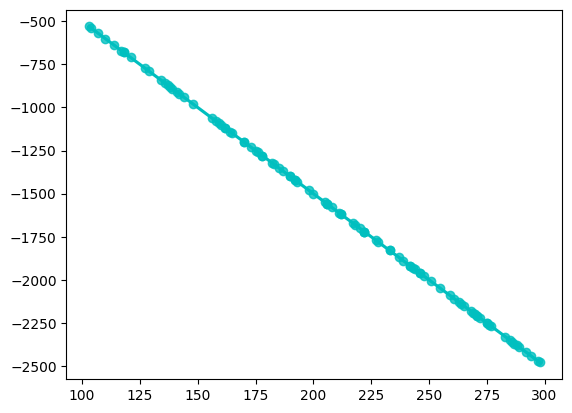

In [16]:
# Predict the demand of the new price
X_predict = np.random.randint(100, 300, 100).reshape(-1, 1)
Y_predict = model.predict(X_predict)

# Plot the prediction
sns.regplot(x=X_predict, 
            y=Y_predict,
            color='c')


## 6. Distribution testing

In [17]:
# Import data
skus = pd.read_csv('sku_distributions.csv')
skus.head()

,day,grape_juice,cantalop_juice,apple_juice
0,1,0,10,96
1,2,3,10,92
2,3,1,9,84
3,4,2,10,113
4,5,1,10,65


In [18]:
# Apple juice data
apple_juice = np.array(skus['apple_juice'])

# Mean of the apple juice data
mean = apple_juice.mean()
print(f'''Mean of the apple juice data: {mean}''')

# Standard deviation of the apple juice data
std = apple_juice.std()
print(f'''Standard deviation of the apple juice data: {std}''')

# Kolmogorov-Smirnov test
# Null hypothesis: The data is normally distributed
# Alternative hypothesis: The data is not normally distributed
kstest(apple_juice, 'norm', args=(mean, std))

Mean of the apple juice data: 100.73873873873873
Standard deviation of the apple juice data: 20.190256493370235


KstestResult(statistic=np.float64(0.04011911785947586), pvalue=np.float64(0.6423077067552097), statistic_location=np.int64(100), statistic_sign=np.int8(1))

In [19]:
# Distribution name
distribution_name = ['norm',
                     'exponweib',
                     'weibull_max',
                     'weibull_min',
                     'pareto',
                     'genextreme']

# Empty list to store the result
result = []

# Parameters of the distribution
parameters = dict({})

In [20]:
# Example of fitting the data into the distribution for normal distribution
norm_parameter = getattr(st, 'norm')
norm_parameter.fit(apple_juice)

(np.float64(100.73873873873873), np.float64(20.190256493370235))

In [21]:
# Kolmogorov-Smirnov test for each distribution
for i in distribution_name:
    parameters = getattr(st, i)
    fitting = parameters.fit(apple_juice)
    test = kstest(apple_juice, i, args=fitting)
    result.append([i,test])
    print(f'''The p-value for {i} distribution is {str(test[1])}''')

The p-value for norm distribution is 0.6423077067552097
The p-value for exponweib distribution is 1.1842591378527991e-172
The p-value for weibull_max distribution is 2.2685136143704785e-247
The p-value for weibull_min distribution is 0.34810501680216566
The p-value for pareto distribution is 1.6172750367237305e-31
The p-value for genextreme distribution is 0.26068355451614744


C:\Users\thanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:2313: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
